<a href="https://colab.research.google.com/github/ZHAOTransparentAI/MaschinellesLernen/blob/main/Active_Learning_with_SVM_Version_Space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

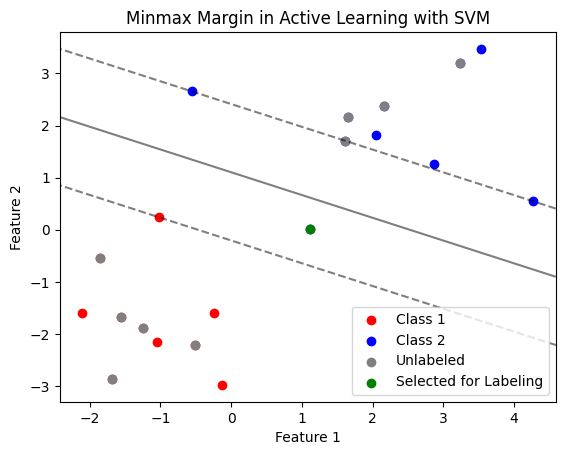

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate random data
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) - [2, 2], np.random.randn(10, 2) + [2, 2]]
Y = [0] * 10 + [1] * 10

# Initial labeled data
X_train = np.concatenate([X[:5], X[10:15]])
Y_train = np.concatenate([Y[:5], Y[10:15]])

# Unlabeled data
X_unlabeled = np.concatenate([X[5:10], X[15:20]])

# Train initial SVM model
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, Y_train)

# Calculate decision function values for unlabeled samples
decisions = clf.decision_function(X_unlabeled)
min_margin_index = np.argmin(np.abs(decisions))  # Find the index of the sample with the smallest margin

# Plotting
plt.scatter(X[:10, 0], X[:10, 1], color='red', label='Class 1')
plt.scatter(X[10:20, 0], X[10:20, 1], color='blue', label='Class 2')
plt.scatter(X_unlabeled[:, 0], X_unlabeled[:, 1], color='gray', label='Unlabeled')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Mark the sample with the smallest margin
plt.scatter(X_unlabeled[min_margin_index, 0], X_unlabeled[min_margin_index, 1], color='green', label='Selected for Labeling')

plt.legend()
plt.title('Minmax Margin in Active Learning with SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
